In [ ]:
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install roboflow

In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ztRIZhXv75K1J97cjiQk")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")


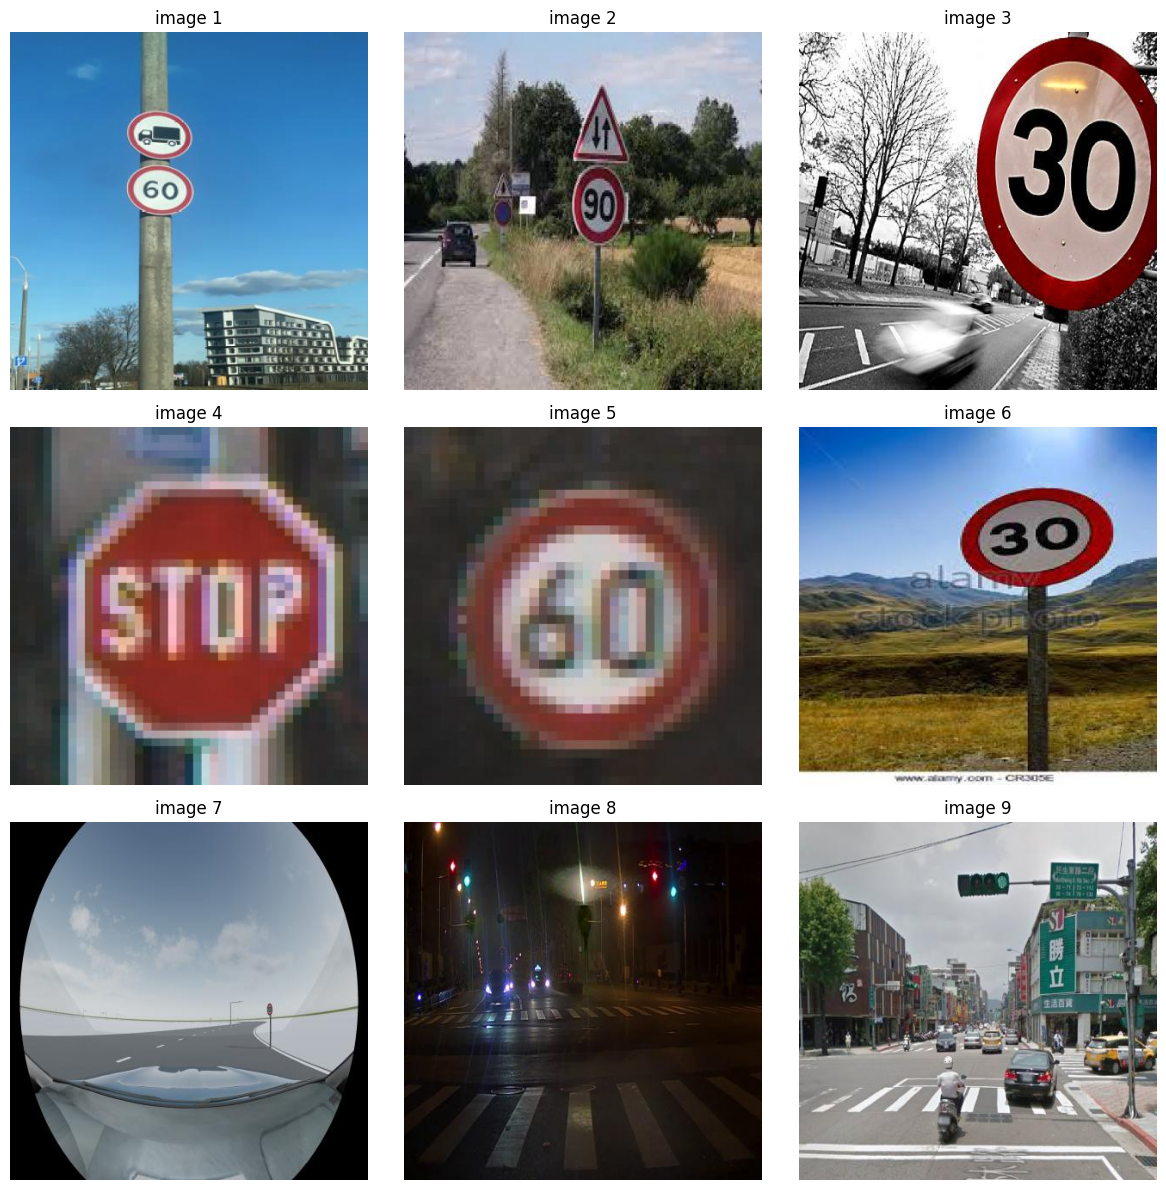

In [ ]:
image_dir = './Self-Driving-Cars-6/train/images'

num_samples = 9
image_files = os.listdir(image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(num_samples):
  image = rand_images[i]
  ax = axes[i // 3, i % 3]
  ax.imshow(plt.imread(os.path.join(image_dir, image)))
  ax.set_title(f'image {i + 1}')
  ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img = cv2.imread('./Self-Driving-Cars-6/train/images/00000_00000_00005_png.rf.998f471ba534c1f2ccafdafcd63c12a4.jpg')
h, w, c = img.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


In [ ]:
model = YOLO("yolov8n.pt")


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.0MB/s]



image 1/1 /content/Self-Driving-Cars-6/test/images/FisheyeCamera_1_00018_png.rf.765c48e66c9a0a7d70f6e4b0af00494c.jpg: 640x640 1 stop sign, 492.4ms
Speed: 21.3ms preprocess, 492.4ms inference, 31.6ms postprocess per image at shape (1, 3, 640, 640)


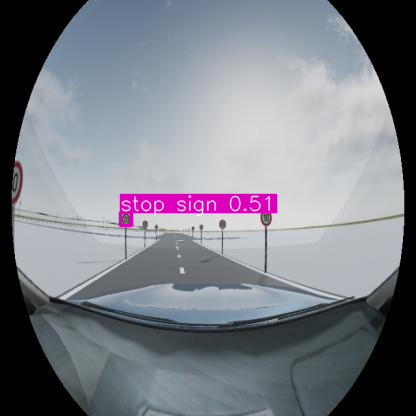

In [ ]:
img = '/content/Self-Driving-Cars-6/test/images/FisheyeCamera_1_00018_png.rf.765c48e66c9a0a7d70f6e4b0af00494c.jpg'
result_pred = model.predict(source=img, imgsz=(640))
plot = result_pred[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray

In [ ]:
fin_model = YOLO("yolov8n.pt")

result_model = fin_model.train(data="/content/Self-Driving-Cars-6/data.yaml", epochs=10, batch = -1, optimizer = 'auto')

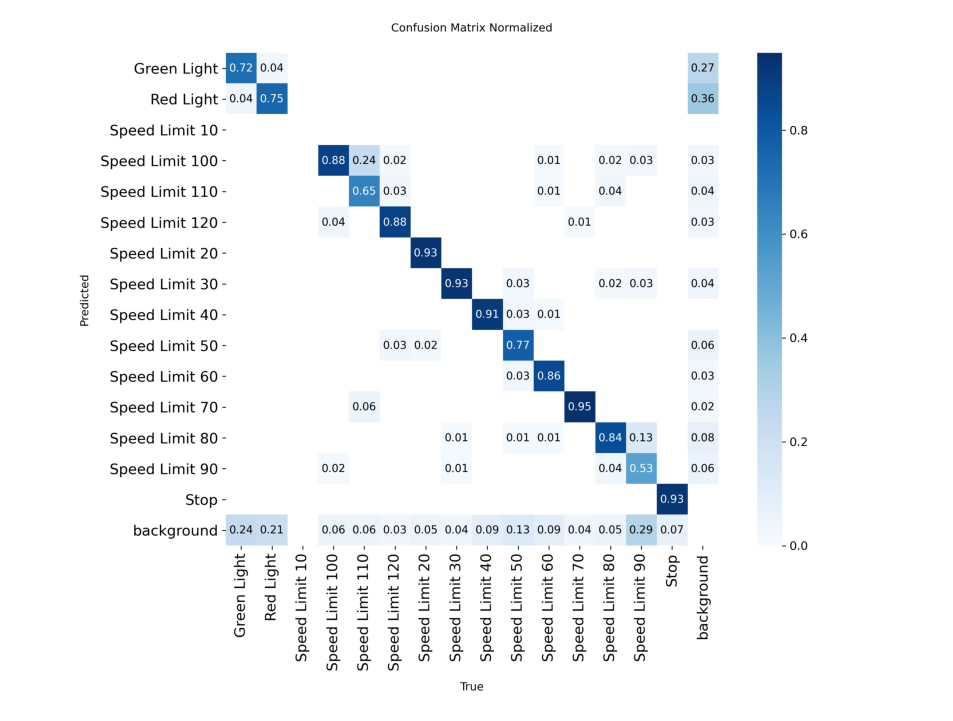

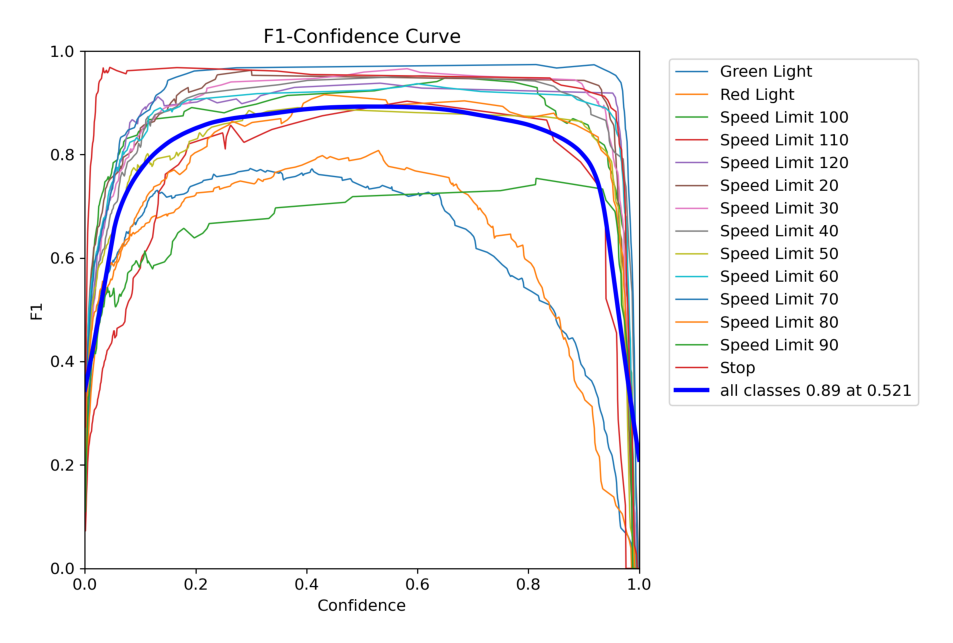

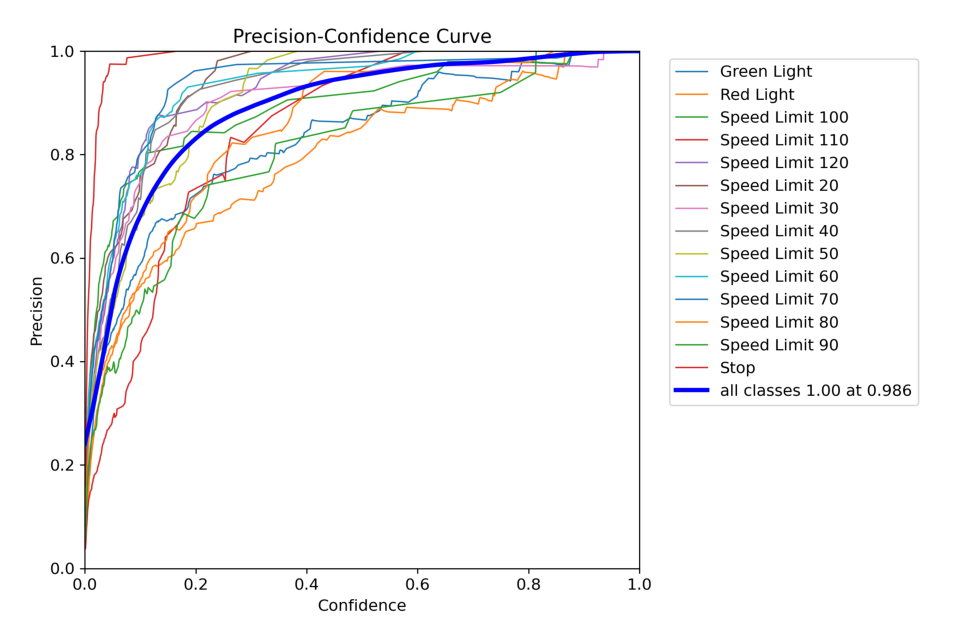

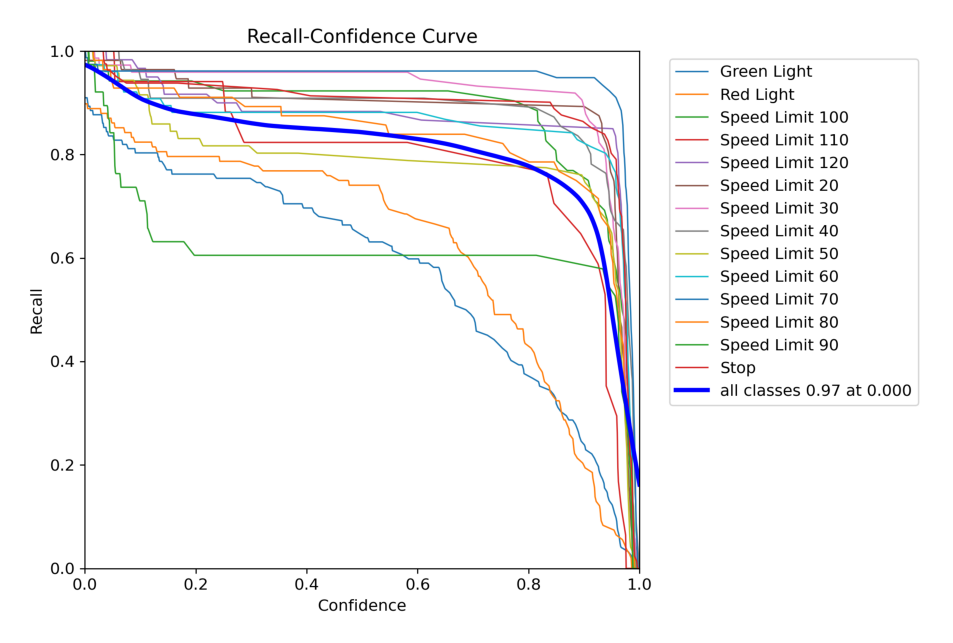

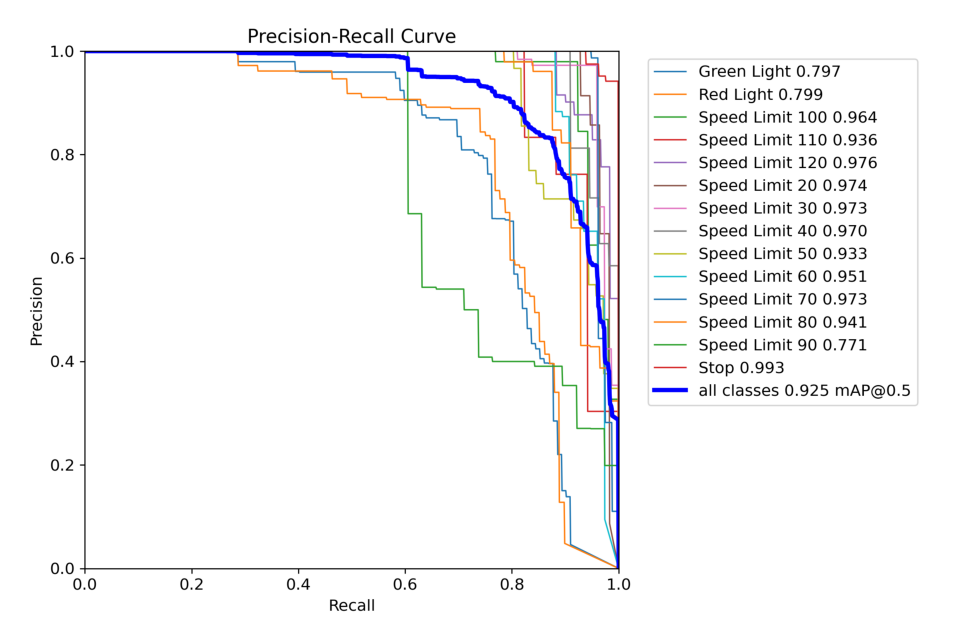

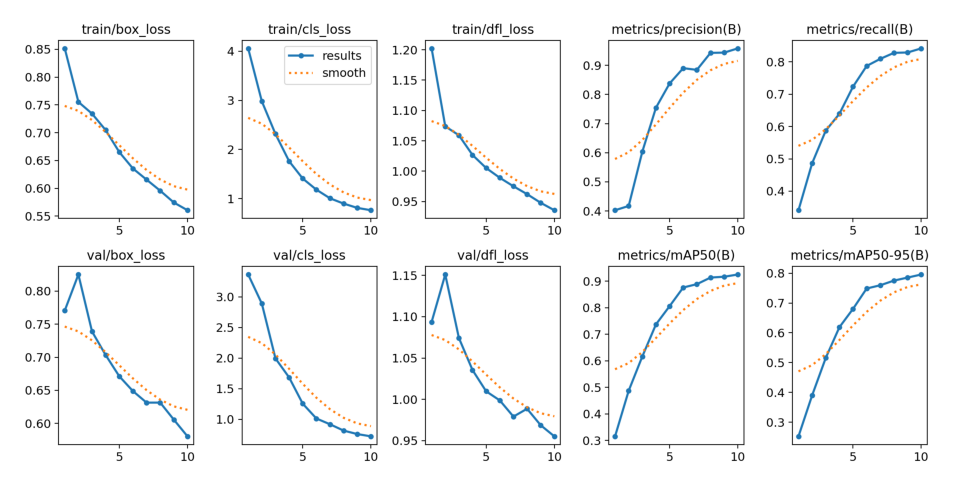

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_path, image_files):
  for image_file in image_files:
    image_path = os.path.join(post_training_path, image_file)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10), dpi=120)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


image_files = [
    'confusion_matrix_normalized.png',
    'BoxF1_curve.png',
    'BoxP_curve.png',
    'BoxR_curve.png',
    'BoxPR_curve.png',
    'results.png'
]

post_training_path = '/content/runs/detect/train2'


display_images(post_training_path, image_files)


In [ ]:
result_model = pd.read_csv('/content/runs/detect/train2/results.csv')

result_model.tail(10)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,2880.08,0.85158,4.05756,1.20235,0.40245,0.34083,0.31554,0.25241,0.77055,3.36362,1.09361,0.000175,0.000175,0.000175
1,2,5750.10,0.75536,2.98092,1.07389,0.41713,0.48621,0.48739,0.38990,0.82507,2.88950,1.15099,0.000315,0.000315,0.000315
2,3,8608.22,0.73425,2.31536,1.05916,0.60368,0.58733,0.61640,0.51572,0.73891,1.99377,1.07426,0.000421,0.000421,0.000421
3,4,11452.80,0.70466,1.76126,1.02662,0.75459,0.63937,0.73723,0.61875,0.70332,1.68395,1.03544,0.000370,0.000370,0.000370
4,5,14292.60,0.66512,1.40774,1.00514,0.83776,0.72347,0.80583,0.68042,0.67122,1.25491,1.00974,0.000318,0.000318,0.000318
5,6,17150.50,0.63559,1.18156,0.98905,0.89029,0.78752,0.87610,0.74873,0.64885,1.01342,0.99875,0.000266,0.000266,0.000266
6,7,20014.40,0.61562,1.00543,0.97507,0.88442,0.80957,0.88864,0.75968,0.63142,0.91865,0.97918,0.000214,0.000214,0.000214
7,8,22877.10,0.59570,0.89770,0.96208,0.94281,0.82813,0.91350,0.77527,0.63147,0.81536,0.98866,0.000161,0.000161,0.000161
8,9,25726.70,0.57446,0.81037,0.94782,0.94372,0.82929,0.91662,0.78539,0.60567,0.75890,0.96873,0.000109,0.000109,0.000109
9,10,28586.90,0.56060,0.76259,0.93557,0.95815,0.84189,0.92498,0.79572,0.58047,0.72180,0.95530,0.000057,0.000057,0.000057


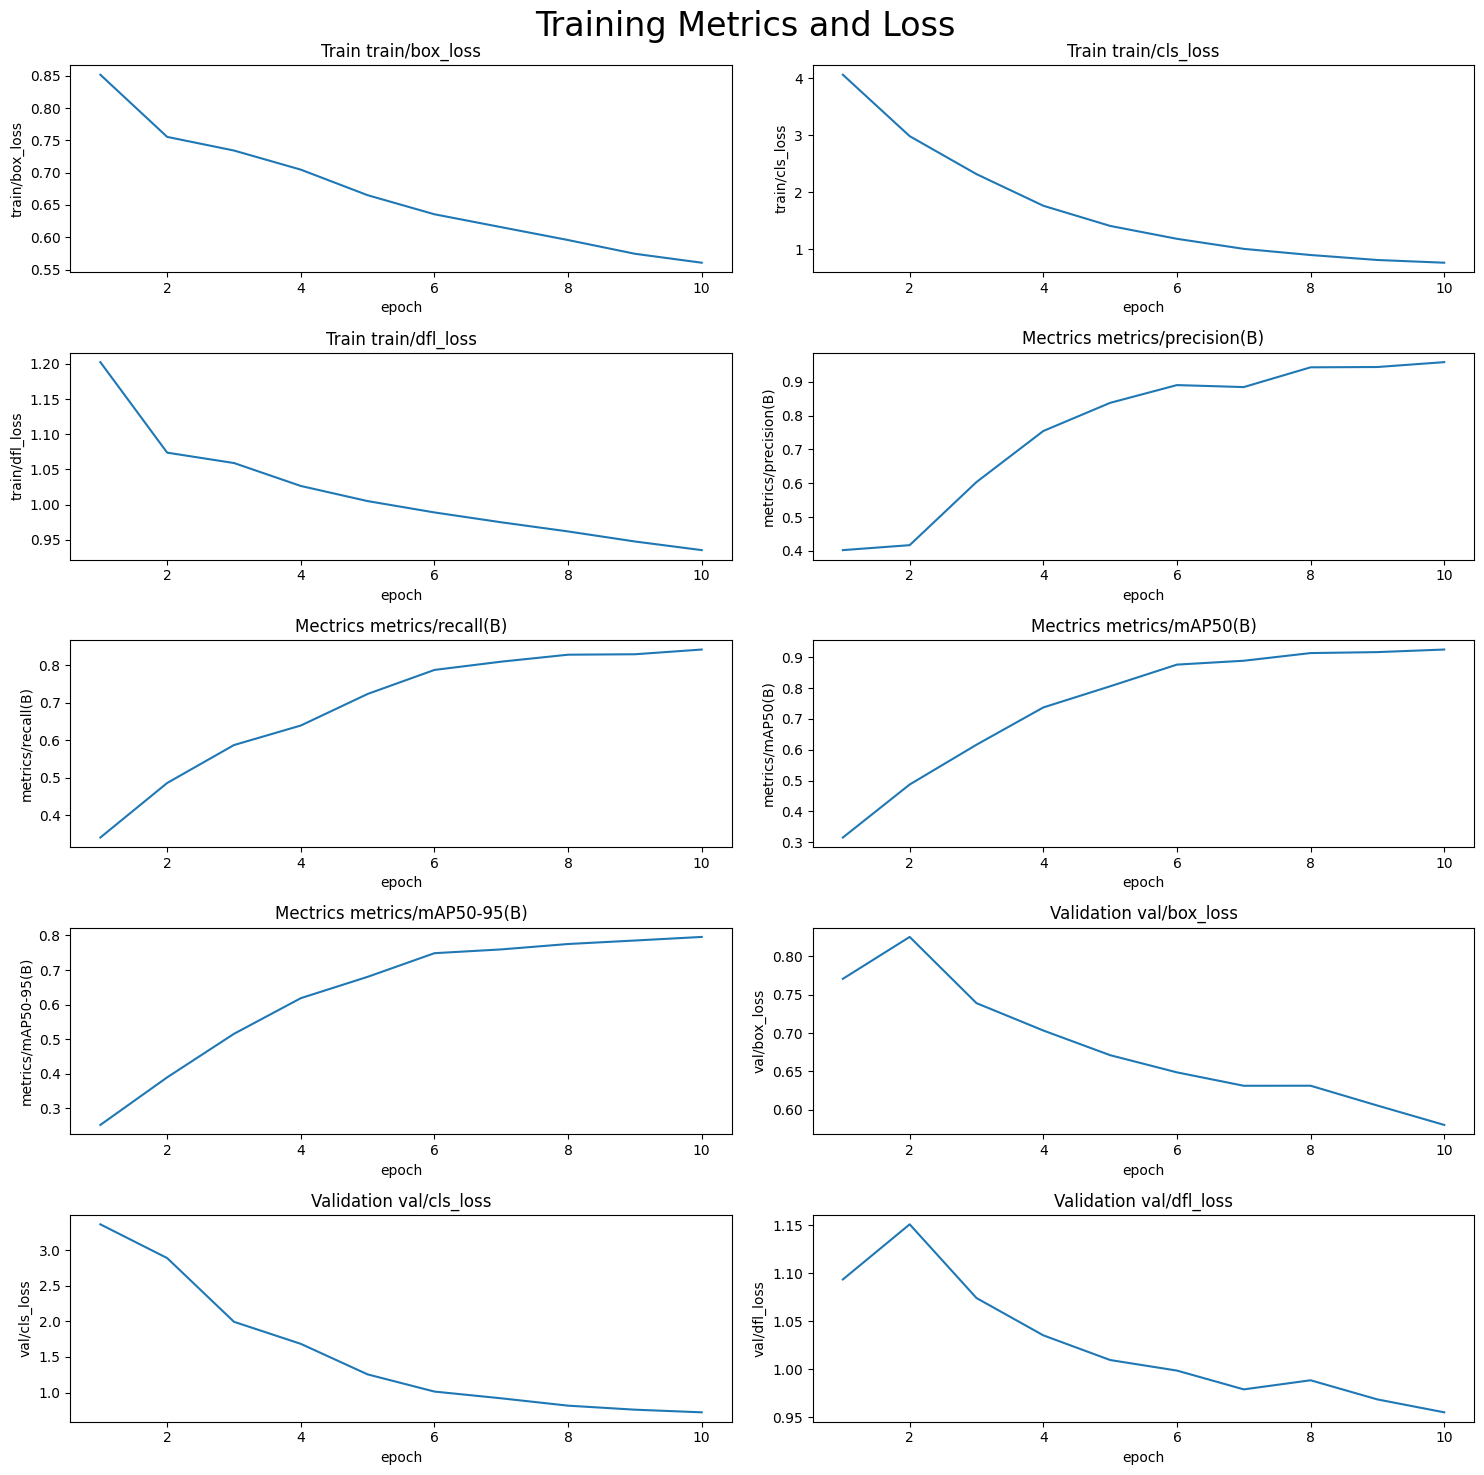

In [ ]:
result_model.columns = result_model.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

lst = ['train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)',
       'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
       'val/box_loss', 'val/cls_loss', 'val/dfl_loss']
for i in range(len(lst)):
  sns.lineplot(x='epoch', y=lst[i], data=result_model, ax=axs[i // 2, i % 2])

for i in range(len(lst)):
  if i < 3:
    axs[i // 2, i % 2].set(title=f"Train {lst[i]}")
  elif i < 7:
    axs[i // 2, i % 2].set(title=f"Mectrics {lst[i]}")
  else:
    axs[i // 2, i % 2].set(title=f"Validation {lst[i]}")

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(0.8)
plt.tight_layout()
plt.show()

In [ ]:
val_model = YOLO('/content/runs/detect/train2/weights/best.pt')

metrics = val_model.val(split = 'val')



In [ ]:
print("Precision:", metrics.box.p)
print("Recall:", metrics.box.r)
print("mAP50:", metrics.box.map50)
print("mAP50-95:", metrics.box.map)

In [ ]:
def normalaze(image):
  return image / 255.0

def resize(image, size):
  return cv2.resize(image, dsize=size)


dataset_path = '/content/Self-Driving-Cars-6'

valid_images_path = os.path.join(dataset_path, 'test', 'images')

image_files = [file for file in os.listdir(valid_images_path)
if file.endswith('.jpg')]

if len(image_files) > 0:
  num_images = len(image_files)
  step_size = max(1, num_images // 9)

  selected_images = [image_files[i] for i in range(0, num_images, step_size)]

  fig, axes = plt.subplots(3, 3, figsize=(20, 21))
  fig.suptitle('Validation Set Inferencees', fontsize=24)

  for i, ax in enumerate(axes.flatten()):
    if i < len(selected_images):
      image_path = os.path.join(valid_images_path, selected_images[i])

      image = cv2.imread(image_path)

      if image is not None:
        resized_images = resize(image, size=(640, 640))

        normalazed_images = normalaze(resized_images)

        normalazed_images_uint8 = (normalazed_images * 255).astype(np.uint8)

        results = val_model.predict(source=normalazed_images_uint8,
                                    imgsz=640, conf=0.5)

        annotated_image = results[0].plot(line_width=1)

        annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

        ax.imshow(annotated_image_rgb)

      else:
        print(f"Failed to load image {image_path}")

    ax.axis('off')

  plt.tight_layout()
  plt.show()





Output hidden; open in https://colab.research.google.com to view.

In [ ]:
val_model.export(format="onnx")